In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df0 = pd.read_excel("sample dataset.xlsx")
df1 = pd.read_csv("clear dataset.csv")
df2 = pd.read_csv("clear dataset feature selection.csv")

In [3]:
print(df2.info())
print(df2.describe())
print(df2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 196 non-null    int64  
 1   number of breakfast        196 non-null    int64  
 2   number of launch           196 non-null    int64  
 3   number of dinner           196 non-null    int64  
 4   Vegetables                 196 non-null    int64  
 5   tea Intake (estekan/day)   196 non-null    float64
 6   sumScore                   196 non-null    int64  
 7   tertiles                   196 non-null    int64  
 8   n_90                       196 non-null    int64  
 9   n_91                       196 non-null    int64  
 10  n_92                       196 non-null    int64  
 11  n_93                       196 non-null    int64  
 12  sex_Boy                    196 non-null    int64  
 13  sex_Girl                   196 non-null    int64  

In [20]:
import io
from fpdf import FPDF

In [21]:
f = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
f

,h_20,h_24,h_28,Vegetables,tea Intake (estekan/day),sumScore,tertiles,n_90,n_91,n_92,...,sex_Girl,sweets,fruits,dairy,oils,active_transport,physical_activity,leisure_time(hour / week),illnesses,n_93_cluster
0,6,7,7,2,1.5,21,2,2,0,2,...,0,2.375,3.0,2.000000,1.0,0,2.50,12.000000,0,2
1,6,6,6,3,1.5,21,2,1,0,2,...,0,1.375,3.0,3.000000,1.0,1,1.50,7.714286,9,2
2,7,5,7,2,1.5,21,2,1,2,3,...,0,0.875,3.0,3.000000,1.0,1,1.25,10.428571,0,2
3,7,7,7,2,1.5,21,2,2,0,2,...,0,1.375,3.0,2.666667,2.0,0,1.50,8.142857,0,2
4,6,7,7,3,1.5,21,2,0,2,1,...,0,0.875,3.0,1.000000,1.0,1,1.00,9.571429,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2,3,7,2,1.5,15,2,2,0,3,...,1,1.875,2.5,3.000000,0.5,0,1.00,10.285714,10,2
192,7,7,7,3,0.0,20,1,2,0,3,...,1,0.875,2.5,3.000000,0.0,0,1.00,10.000000,8,2
193,7,7,7,2,1.5,39,0,2,0,3,...,1,1.500,3.0,3.000000,0.0,0,0.75,7.428571,2,2
194,2,2,7,2,1.5,21,2,2,0,3,...,1,1.500,2.0,0.000000,2.0,0,0.75,8.571429,3,2


In [23]:
# --- گرفتن خروجی info ---
info_buffer = io.StringIO()
f.info(buf=info_buffer)
info_summary = info_buffer.getvalue()

# --- آمار توصیفی به صورت transposed ---
desc_df = f.describe().T.round(2)

# --- شمارش مقادیر null ---
nulls = f.isnull().sum()

# ---------------- PDF Generation ----------------
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(0, 10, "Initial Data Analysis Report", ln=True, align='C')
pdf.ln(10)

# --- بخش ۱: info ---
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, "1. Dataset Info", ln=True)
pdf.set_font("Arial", size=9)
for line in info_summary.splitlines():
    pdf.multi_cell(0, 5, line)
pdf.ln(5)

# --- بخش ۲: جدول آمار توصیفی (ویژگی‌ها در ردیف) ---
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, "2. Descriptive Statistics", ln=True)

# تنظیمات جدول
pdf.set_font("Arial", 'B', 8)
col_width = 20  # تنظیم برای جای‌گیری 8 ستون آماری
row_height = 7

# Header row
pdf.set_fill_color(220, 220, 220)
headers = ['Feature'] + list(desc_df.columns)
for header in headers:
    pdf.cell(col_width, row_height, str(header), border=1, fill=True,align='C')
pdf.ln()

# Data rows
pdf.set_font("Arial", size=8)
for idx, row in desc_df.iterrows():
    pdf.cell(col_width, row_height, str(idx), border=1 , align='C')
    for val in row:
        pdf.cell(col_width, row_height, str(val), border=1 , align='C')
    pdf.ln()

pdf.ln(5)

# --- بخش ۳: مقادیر Null ---
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, "3. Missing Values per Column", ln=True)
pdf.set_font("Arial", size=9)
for col, val in nulls.items():
    pdf.cell(0, 6, f"{col}: {val}", ln=True)

# ذخیره فایل
pdf.output("final_data_analysis.pdf")
print("✅ فایل PDF با جدول کامل و بدون ستون Unnamed ساخته شد: final_data_analysis.pdf")

✅ فایل PDF با جدول کامل و بدون ستون Unnamed ساخته شد: final_data_analysis.pdf


In [24]:
# --- گرفتن خروجی info ---
info_buffer = io.StringIO()
df1.info(buf=info_buffer)
info_summary = info_buffer.getvalue()

# --- آمار توصیفی به صورت transposed ---
desc_df = df1.describe().T.round(2)

# --- شمارش مقادیر null ---
nulls = df1.isnull().sum()

# ---------------- PDF Generation ----------------
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(0, 10, "Initial Data Analysis Report", ln=True, align='C')
pdf.ln(10)

# --- بخش ۱: info ---
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, "1. Dataset Info", ln=True)
pdf.set_font("Arial", size=9)
for line in info_summary.splitlines():
    pdf.multi_cell(0, 5, line)
pdf.ln(5)

# --- بخش ۲: جدول آمار توصیفی (ویژگی‌ها در ردیف) ---
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, "2. Descriptive Statistics", ln=True)

# تنظیمات جدول
pdf.set_font("Arial", 'B', 8)
col_width = 20  # تنظیم برای جای‌گیری 8 ستون آماری
row_height = 7

# Header row
pdf.set_fill_color(220, 220, 220)
headers = ['Feature'] + list(desc_df.columns)
for header in headers:
    pdf.cell(col_width, row_height, str(header), border=1, fill=True,align='C')
pdf.ln()

# Data rows
pdf.set_font("Arial", size=8)
for idx, row in desc_df.iterrows():
    pdf.cell(col_width, row_height, str(idx), border=1 , align='C')
    for val in row:
        pdf.cell(col_width, row_height, str(val), border=1 , align='C')
    pdf.ln()

pdf.ln(5)

# --- بخش ۳: مقادیر Null ---
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, "3. Missing Values per Column", ln=True)
pdf.set_font("Arial", size=9)
for col, val in nulls.items():
    pdf.cell(0, 6, f"{col}: {val}", ln=True)

# ذخیره فایل
pdf.output("final_data_analysis d1.pdf")
print("✅ فایل PDF با جدول کامل و بدون ستون Unnamed ساخته شد: final_data_analysis d1.pdf")

✅ فایل PDF با جدول کامل و بدون ستون Unnamed ساخته شد: final_data_analysis d1.pdf


In [30]:
print(df0.describe())

                id2     cluster    birth_ye    sample_c        h_18   
count  2.000000e+02  199.000000  199.000000  199.000000  178.000000  \
mean   1.111944e+09   11.783920   82.135678    5.477387    7.800000   
std    6.727540e+06    6.730643    2.808120    2.882942    1.155593   
min    1.101119e+09    1.000000   76.000000    1.000000    6.000000   
25%    1.106118e+09    6.000000   80.000000    3.000000    7.000000   
50%    1.112218e+09   12.000000   82.000000    6.000000    7.300000   
75%    1.118218e+09   18.000000   84.000000    8.000000    9.000000   
max    1.123129e+09   23.000000   87.000000   10.000000   12.000000   

             h_19        h_22        h_23        h_26        h_27      h_63_1   
count  184.000000  179.000000  187.000000  193.000000  189.000000  185.000000  \
mean     9.230978   13.941620   14.047326   20.900000   21.005291    8.302162   
std      0.968150    0.911267    0.702888    0.921615    0.961478    1.353255   
min      7.000000   11.000000   12.0

In [28]:
# --- گرفتن خروجی info ---
info_buffer = io.StringIO()
df0.info(buf=info_buffer)
info_summary = info_buffer.getvalue()

# --- آمار توصیفی به صورت transposed ---
desc_df = df0.describe().T.round(2)

# --- شمارش مقادیر null ---
nulls = df0.isnull().sum()

# ---------------- PDF Generation ----------------
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(0, 10, "Initial Data Analysis Report", ln=True, align='C')
pdf.ln(10)

# --- بخش ۱: info ---
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, "1. Dataset Info", ln=True)
pdf.set_font("Arial", size=9)
for line in info_summary.splitlines():
    pdf.multi_cell(0, 5, line)
pdf.ln(5)

# --- بخش ۲: جدول آمار توصیفی (ویژگی‌ها در ردیف) ---
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, "2. Descriptive Statistics", ln=True)

# تنظیمات جدول
pdf.set_font("Arial", 'B', 8)
col_width = 20  # تنظیم برای جای‌گیری 8 ستون آماری
row_height = 7

# Header row
pdf.set_fill_color(220, 220, 220)
headers = ['Feature'] + list(desc_df.columns)
for header in headers:
    pdf.cell(col_width, row_height, str(header), border=1, fill=True,align='C')
pdf.ln()

# Data rows
pdf.set_font("Arial", size=8)
for idx, row in desc_df.iterrows():
    pdf.cell(col_width, row_height, str(idx), border=1 , align='C')
    for val in row:
        pdf.cell(col_width, row_height, str(val), border=1 , align='C')
    pdf.ln()

pdf.ln(5)

# --- بخش ۳: مقادیر Null ---
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, "3. Missing Values per Column", ln=True)
pdf.set_font("Arial", size=9)
for col, val in nulls.items():
    pdf.cell(0, 6, f"{col}: {val}", ln=True)

# ذخیره فایل
pdf.output("final_data_analysis d0.pdf")
print("✅ فایل PDF با جدول کامل و بدون ستون Unnamed ساخته شد: final_data_analysis d0.pdf")

✅ فایل PDF با جدول کامل و بدون ستون Unnamed ساخته شد: final_data_analysis d0.pdf


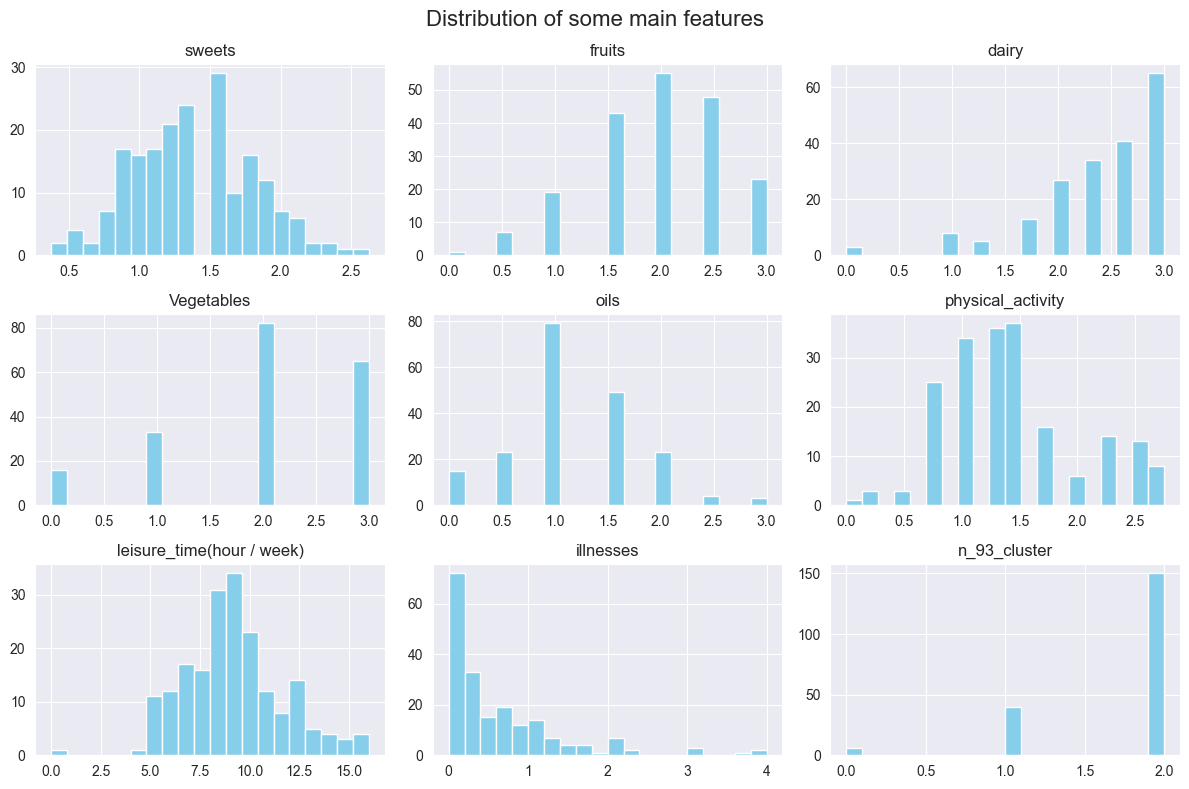

In [12]:
df2[["sweets","fruits","dairy", "Vegetables","oils","physical_activity", "leisure_time(hour / week)", "illnesses","n_93_cluster"]].hist(
    bins=20, figsize=(12, 8), color='skyblue'
)
plt.suptitle("Distribution of some main features", fontsize=16)
plt.tight_layout()
plt.show()


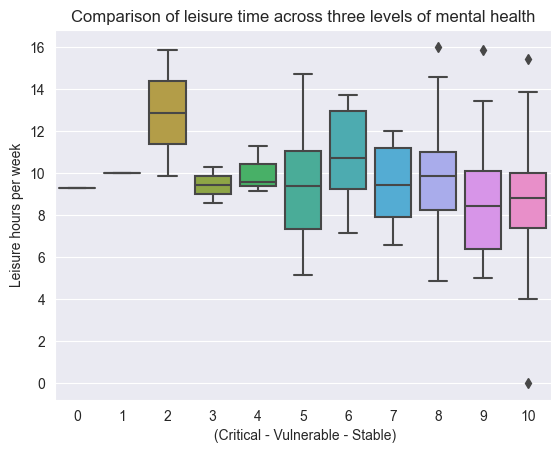

In [14]:
sns.boxplot(x="n_93", y="leisure_time(hour / week)", data=df2)
plt.title("Comparison of leisure time across three levels of mental health")
plt.xlabel(" (Critical - Vulnerable - Stable)")
plt.ylabel("Leisure hours per week")
plt.show()


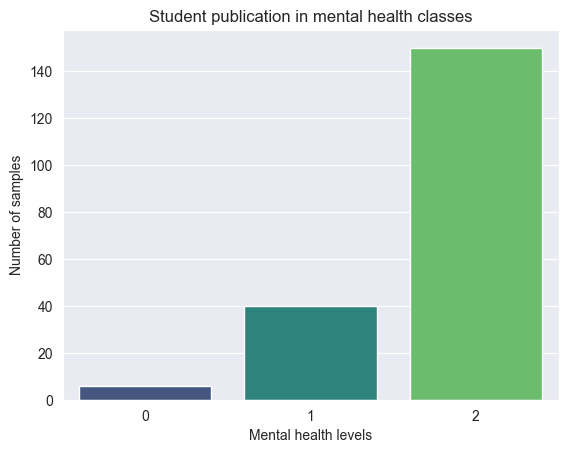

In [4]:
sns.countplot(x="n_93_cluster", data=df2, palette="viridis")
plt.title("Student publication in mental health classes")
plt.xlabel("Mental health levels")
plt.ylabel("Number of samples")
plt.show()


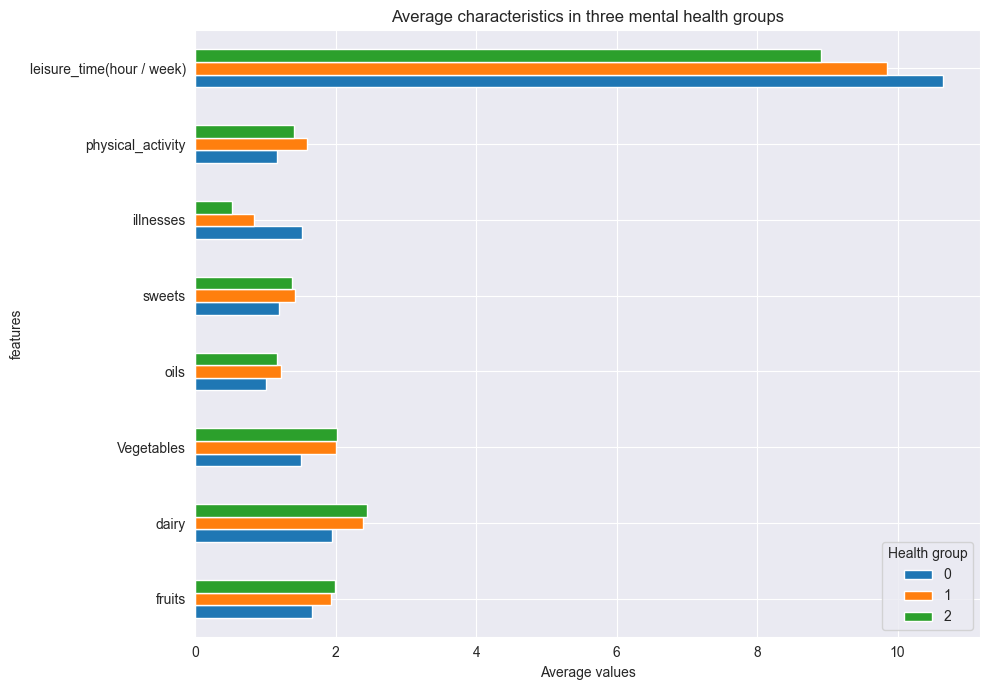

In [9]:
grouped = df2.groupby('n_93_cluster')[['fruits', 'dairy','Vegetables','oils','sweets','illnesses', 'physical_activity', 'leisure_time(hour / week)']].mean()
grouped.T.plot(kind='barh', figsize=(10, 7))
plt.title("Average characteristics in three mental health groups")
plt.xlabel("Average values")
plt.ylabel("features")
plt.legend(title="Health group")
plt.tight_layout()
plt.show()
